In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
#from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    #precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    #roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns
from matplotlib import pyplot as plt

#Google Colab Imports
# Use sklearn.metrics.ConfusionMatrixDisplay instead of plot_confusion_matrix
from sklearn.metrics import confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report

In [5]:
X_init = pd.read_csv('/content/sample_data/training_set_features.csv', index_col=0)
y_init = pd.read_csv('/content/sample_data/training_set_labels.csv', index_col=0)

In [ ]:
y_init.info()

In [ ]:
X_init.info()

In [ ]:
(X_init.isna().sum()/len(X_init)).sort_values(ascending=False)

In [9]:
X_drop = X_init.drop(['employment_occupation', 'employment_industry', 'health_insurance'], axis=1)

## **Visualizations**

In [142]:
y_cat = y_init['seasonal_vaccine'].apply(lambda x: 'Vaccine'if x == 1 else 'No Vaccine')

[Text(0, 0.5, '# of People'), Text(0.5, 1.0, 'Seasonal Flu Vaccine')]

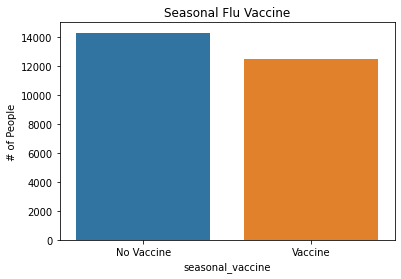

In [161]:
# Showing how many people got seasonal vaccine
ax = sns.countplot(x=y_cat)

ax.set(ylabel='# of People',
       title='Seasonal Flu Vaccine')

In [ ]:
# Showing breakdown of each race surveyed

sns.countplot(x=X_init["race"])

In [ ]:
# Showing breakdown of sex surveyed

sns.countplot(x=X_init["sex"])

In [ ]:
# Showing breakdown of age surveyed

sns.countplot(x=X_init["age_group"])

In [ ]:
# Showing breakdown of the household income the people surveyed

sns.countplot(x=X_init["income_poverty"])

In [ ]:
# Showing breakdown of age surveyed

sns.countplot(x=X_init["age_group"])

In [ ]:
# 55+ makes up almost 45% of the data. 80% White. 60% Female.

#X_drop.age_group.value_counts(normalize=True)
#X_drop.race.value_counts(normalize=True)
#X_drop.sex.value_counts(normalize=True)
X_drop.rent_or_own.value_counts(normalize=True)



In [26]:
# Combining training_set_labels and training_set_features. Created a vaccinated and unvaccinated df.

Z_init = y_init
frames = [X_init,Z_init]
data_combined = pd.concat(frames,axis=1)

#df.loc[df['col1'] == value]

vaccinated_df = data_combined.loc[data_combined['seasonal_vaccine'] == 1]

unvaccinated_df = data_combined.loc[data_combined['seasonal_vaccine'] == 0]

In [138]:
vaccinated_df['marital_status'].value_counts(normalize=True)

Married        0.563557
Not Married    0.436443
Name: marital_status, dtype: float64

In [157]:
vaccinated_df.groupby(['age_group']).mean()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
age_group,,,,,,,,,,,,,,,,,,,,,
18 - 34 Years,1.564016,1.363452,0.095270,0.750676,0.086370,0.865813,0.318028,0.286968,0.707235,0.374553,...,4.075549,2.848214,2.543523,4.261168,3.356306,2.217481,1.130345,0.994483,0.458221,1.0
35 - 44 Years,1.849964,1.475951,0.081237,0.775937,0.089017,0.892396,0.369706,0.316547,0.760230,0.355674,...,4.101164,2.985423,2.546647,4.354792,3.480205,2.136164,0.969410,1.446468,0.418638,1.0
45 - 54 Years,1.870000,1.472805,0.058178,0.790153,0.092813,0.899524,0.348571,0.327143,0.758226,0.307385,...,4.163628,2.826233,2.519406,4.424664,3.462056,2.088023,0.991404,0.585005,0.400095,1.0
55 - 64 Years,1.825458,1.422724,0.036985,0.782686,0.083714,0.880056,0.392807,0.363284,0.751058,0.319315,...,4.139056,2.689472,2.373050,4.483837,3.389343,2.030195,0.864627,0.126231,0.418425,1.0
65+ Years,1.730786,1.184562,0.031004,0.735974,0.074050,0.848379,0.440856,0.421718,0.722417,0.261297,...,3.976943,2.353407,2.265158,4.519065,3.087351,1.912726,0.611063,0.042733,0.304121,1.0


In [154]:
unvaccinated_df.groupby(['age_group']).mean()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
age_group,,,,,,,,,,,,,,,,,,,,,
18 - 34 Years,1.411591,1.142090,0.072215,0.684493,0.056032,0.767311,0.288208,0.282148,0.579812,0.153193,...,3.719083,2.242978,2.349180,3.693593,2.376991,2.220969,1.179367,0.888858,0.083356,0.0
35 - 44 Years,1.563904,1.256851,0.064898,0.717917,0.057504,0.807347,0.319184,0.307912,0.642127,0.142282,...,3.655717,2.197423,2.395842,3.598166,2.269311,2.248114,0.966625,1.354610,0.072157,0.0
45 - 54 Years,1.526988,1.279233,0.042451,0.715752,0.057079,0.805112,0.320115,0.307323,0.641920,0.130053,...,3.654994,2.036917,2.324368,3.615335,2.128906,2.211350,0.981648,0.614295,0.057079,0.0
55 - 64 Years,1.495572,1.248335,0.028729,0.697657,0.058542,0.788660,0.343184,0.308742,0.645841,0.140625,...,3.624674,1.942207,2.282252,3.678772,2.115024,2.165478,0.801619,0.147221,0.059213,0.0
65+ Years,1.461224,1.019892,0.017520,0.646952,0.056951,0.762354,0.409725,0.388262,0.631318,0.140729,...,3.598906,1.920018,2.245317,3.698217,2.117836,2.106422,0.583333,0.066756,0.066726,0.0


In [139]:
unvaccinated_df['marital_status'].value_counts(normalize=True)

Married        0.511184
Not Married    0.488816
Name: marital_status, dtype: float64

# Behavioral Insights on people that did NOT get the seasonal flu vaccination

*   ∼50% concerned about h1n1
*   ∼90% felt they had at least a little knowledge on h1n1
*   ∼95% have taken antiviral medications
*   ∼70% Has avoided close contact with others with flu-like symptoms
*   ∼5% bought a face mask
*   ∼80% frequently washed hands or used hand sanitizer
*   ∼32% reduced time at large gatherings.
*   ∼31% reduced contact with people outside of own household
*   ∼62% avoided touching eyes, nose, or mouth
*   ∼15% h1n1 vaccine was recommended by doctor
*   ∼16% seasonal flu vaccine was recommended by doctor
*   ∼20% had a chronic medical condition
*   ∼8% regular close contact with a child under the age of six months
*   ∼8% Is a healthcare worker

# Opinions
* ∼65% felt the h1n1 vaccine was at least somewhat effective, 20% felt they didn't know effective it was
*   ∼20% felt that the risk of getting sick with H1N1 flu without vaccine was somewhat high, ∼4% didn't know
*   ∼29% were at least somewhat worried of getting sick from taking H1N1 vaccine, ∼1% felt they didn't know
*   ∼72% felt the seasonal flu vaccine was at least somewhat effective, 6% felt they didn't know if it was effective
*   ∼23% felt the risk risk of getting sick with seasonal flu without vaccine was at least somewhat high, ∼2% didn't know what they felt the risk was
*   ∼25% were at least somewhat worried of getting sick from taking seasonal flu vaccine, 1% didn't know if they were worried


# Demographic Insights
*   ∼15% were 65+, 40% between 45-64, 32% 44 and under
*   ∼37% were college grads, 29% some college, 24% high school, 10% less than high school
*   ∼76% White, 10% Black, 6% Other/Multiple, 8% Hispanic
*   ∼55% female, 44% male


# Behavioral Insights on people that got the seasonal flu vaccination

*   ∼60% concerned about h1n1
*   ∼90% felt they had at least a little knowledge on h1n1
*   ∼95% have taken antiviral medications
*   ∼75% Has avoided close contact with others with flu-like symptoms
*   ∼10% bought a face mask
*   ∼87% frequently washed hands or used hand sanitizer
*   ∼40% reduced time at large gatherings.
*   ∼36% reduced contact with people outside of own household
*   ∼74% avoided touching eyes, nose, or mouth
*   ∼30% h1n1 vaccine was recommended by doctor
*   ∼50% seasonal flu vaccine was recommended by doctor
*   ∼36% had a chronic medical condition
*   ∼8% regular close contact with a child under the age of six months
*   ∼15% Is a healthcare worker

# Opinions
*   ∼77% felt the h1n1 vaccine was at least somewhat effective, 16% felt they didn't know effective it was
*   ∼35% felt that the risk of getting sick with H1N1 flu without vaccine was somewhat high, ∼5% didn't know
*   ∼31% were at least somewhat worried of getting sick from taking H1N1 vaccine, ∼1% felt they didn't know
*   ∼92% felt the seasonal flu vaccine was at least somewhat effective, 3% felt they didn't know if it was effective
*   ∼59% felt the risk  of getting sick with seasonal flu without vaccine was at least somewhat high, ∼3% didn't know what they felt the risk was
*   ∼23% were at least somewhat worried of getting sick from taking seasonal flu vaccine, 0% didn't know if they were worried


# Demographic Insights
*   ∼37% were 65+, 38% between 45-64, 20% 44 and under
*   ∼43% were college grads, 27% some college, 22% high school, 8% less than high school
*   ∼84% White, 5% Black, 5% Other/Multiple, 5% Hispanic
*   ∼64% female, 36% male

### **Correlations**

In [76]:
X_drop.corrwith(y_init['h1n1_vaccine']).sort_values(ascending=False)

doctor_recc_h1n1               0.393890
opinion_h1n1_risk              0.323265
opinion_h1n1_vacc_effective    0.269347
opinion_seas_risk              0.258571
doctor_recc_seasonal           0.209864
opinion_seas_vacc_effective    0.179272
health_worker                  0.169768
h1n1_concern                   0.121929
h1n1_knowledge                 0.117951
chronic_med_condition          0.095207
opinion_h1n1_sick_from_vacc    0.075091
behavioral_wash_hands          0.074712
behavioral_touch_face          0.071648
behavioral_face_mask           0.070498
child_under_6_months           0.066962
behavioral_avoidance           0.047690
behavioral_antiviral_meds      0.040608
behavioral_outside_home        0.021768
behavioral_large_gatherings    0.017822
opinion_seas_sick_from_vacc    0.008360
household_adults               0.007545
household_children            -0.003320
dtype: float64

In [77]:
X_drop.corrwith(y_init['seasonal_vaccine']).sort_values(ascending=False)

opinion_seas_risk              0.390106
doctor_recc_seasonal           0.369190
opinion_seas_vacc_effective    0.361875
opinion_h1n1_risk              0.216625
opinion_h1n1_vacc_effective    0.205072
doctor_recc_h1n1               0.198607
chronic_med_condition          0.170174
h1n1_concern                   0.154828
health_worker                  0.127311
behavioral_touch_face          0.120228
h1n1_knowledge                 0.120152
behavioral_wash_hands          0.112414
behavioral_avoidance           0.076395
behavioral_large_gatherings    0.064025
behavioral_outside_home        0.053509
behavioral_face_mask           0.050083
opinion_h1n1_sick_from_vacc    0.027404
child_under_6_months           0.012097
behavioral_antiviral_meds      0.006277
opinion_seas_sick_from_vacc   -0.061510
household_adults              -0.064840
household_children            -0.114614
dtype: float64

In [ ]:
y_init.info()

In [ ]:
y_init['h1n1_vaccine'].value_counts(normalize=True)

In [ ]:
y_init['seasonal_vaccine'].value_counts(normalize=True)

In [ ]:
y_drop = y_init.drop('h1n1_vaccine', axis=1)

In [ ]:
y_drop

In [ ]:
X_drop.corrwith(y_drop['seasonal_vaccine']).sort_values(ascending=False)

### **Modelling**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_drop, y_drop, random_state=50)

In [ ]:
X_train

In [ ]:
X_train['race'].value_counts()

In [ ]:
X_train_nums = X_train.select_dtypes(include=pd.Float64Dtype)
X_train_cat = X_train.select_dtypes(include=object) 

In [ ]:
X_train_nums.isna().sum().sort_values(ascending=False)

In [ ]:
numerical_pipeline = Pipeline(steps=[
    ('impute_nums', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
#describe why median was chose
categorical_pipeline = Pipeline(steps=[
    ('impute_cat', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder())])

trans = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, X_train_nums.columns),
    ('categorical', categorical_pipeline, X_train_cat.columns)
])

In [ ]:
simple_model_pipe = Pipeline(steps=[
    ('trans', trans),
    ('tree', DecisionTreeClassifier(max_depth=2, random_state=50))
    ])

In [ ]:
simple_model_pipe.fit(X_train, y_train)

In [ ]:
simple_model_pipe.score(X_train, y_train)

In [ ]:
simple_model_pipe.score(X_test, y_test)

In [ ]:
simple_preds = simple_model_pipe.predict(X_test)
print(f'This is our f1 score: {f1_score(y_test, simple_preds)}')
print(f'This is our roc-auc score: {roc_auc_score(y_test, simple_preds)}')
print(f'This is our precision score: {precision_score(y_test, simple_preds)}')
print(f'This is our recall score: {recall_score(y_test, simple_preds)}')

In [ ]:
simple_importance = simple_model_pipe.named_steps['tree'].feature_importances_
pd.Series(simple_importance, index=X_train.columns).sort_values(ascending=False)

In [ ]:
trans2 = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, X_train[['opinion_seas_vacc_effective', 'doctor_recc_seasonal']].columns),
    ])
log_model_pipe = Pipeline(steps=[
    ('trans', trans2), ## need to drop out unused columns from the pipeline
    ('log', LogisticRegression(random_state=50))
    ])

In [ ]:
log_model_pipe.fit(X_train[['opinion_seas_vacc_effective', 'doctor_recc_seasonal']], y_train)

In [ ]:
log_model_pipe.score(X_test[['opinion_seas_vacc_effective', 'doctor_recc_seasonal']], y_test)

In [ ]:
simplog_preds = log_model_pipe.predict(X_test[['opinion_seas_vacc_effective', 'doctor_recc_seasonal']])

In [ ]:
print(f'This is our f1 score: {f1_score(y_test, simplog_preds)}')
print(f'This is our roc-auc score: {roc_auc_score(y_test, simplog_preds)}')
print(f'This is our precision score: {precision_score(y_test, simplog_preds)}')
print(f'This is our recall score: {recall_score(y_test, simplog_preds)}')

In [ ]:
log_model_pipe.named_steps['log'].coef_


In [ ]:
log_model_pipe.named_steps['log'].intercept_

In [ ]:
a = log_model_pipe.named_steps['log'].coef_
a

In [ ]:
np.exp(0.85995859) 

In [ ]:
def logOddsConverter(data):
    odds = []
    for item in data:
        odds.append(np.exp(item))
    return odds

In [ ]:
logOddsConverter(a)